In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np


from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
Nsim = 15
FirstStim = 9
LastStim = 20.0

In [3]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [4]:
print Nsim
print FirstStim
print LastStim

15
9
20.0


In [5]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

Mp = np.zeros((int(Nsim), 1))
Hp = np.zeros((int(Nsim), 1))
Stim = np.zeros((int(Nsim), 1))
emg = np.zeros([len(t), int(Nsim)])
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Muscle spindle from muscle SOL built.
Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345566 synapses were built
All the 0 synaptic noises were built


In [6]:
for j  in xrange(0, int(Nsim)):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.time()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i],0)
        pools[2].atualizeAfferentPool(t[i],0)
    toc = time.time()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    pools[0].listSpikes()
    pools[1].listSpikes()
    pools[2].listSpikes()
    sp1 = pools[0].poolTerminalSpikes
    sp2 = pools[1].poolTerminalSpikes
    sp2 = pools[2].poolTerminalSpikes
    for k in xrange(0, len(pools)):
        pools[k].reset()

67.6246452332 seconds
[ 0.]
[ 0.]
68.6218531132 seconds
[ 0.]
[ 0.]
69.2316310406 seconds
[ 0.]
[ 0.]
69.74436903 seconds
[ 0.]
[ 0.04341534]
70.1006040573 seconds
[ 0.]
[ 0.26949873]
70.6718258858 seconds
[ 0.45121357]
[ 0.55550984]
71.0880191326 seconds
[ 0.70538802]
[ 0.83402221]
71.5257070065 seconds
[ 0.97600863]
[ 0.73964618]
72.0824730396 seconds
[ 1.21686674]
[ 0.55259778]
72.4562740326 seconds
[ 1.38609621]
[ 0.35079177]
72.8855419159 seconds
[ 1.4785055]
[ 0.18114932]
73.1642310619 seconds
[ 1.57746856]
[ 0.05752465]
73.728178978 seconds
[ 1.58564031]
[ 0.00816839]
70.6963689327 seconds
[ 1.59264232]
[  1.02436277e-07]
64.1388349533 seconds
[ 1.59483016]
[  9.68736277e-08]


<IPython.core.display.Javascript object>


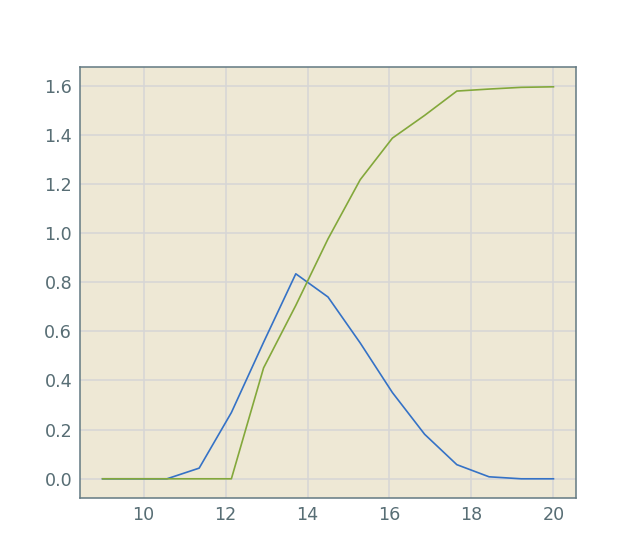

In [7]:
from jupyterthemes import jtplot
jtplot.style()
f1 = plt.figure()
plt.plot(Stim, Hp, Stim, Mp)


In [8]:
np.max(Hp)/np.max(Mp)

0.52295362359966413

In [9]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.45121357],
       [ 0.70538802],
       [ 0.97600863],
       [ 1.21686674],
       [ 1.38609621],
       [ 1.4785055 ],
       [ 1.57746856],
       [ 1.58564031],
       [ 1.59264232],
       [ 1.59483016]])

<IPython.core.display.Javascript object>


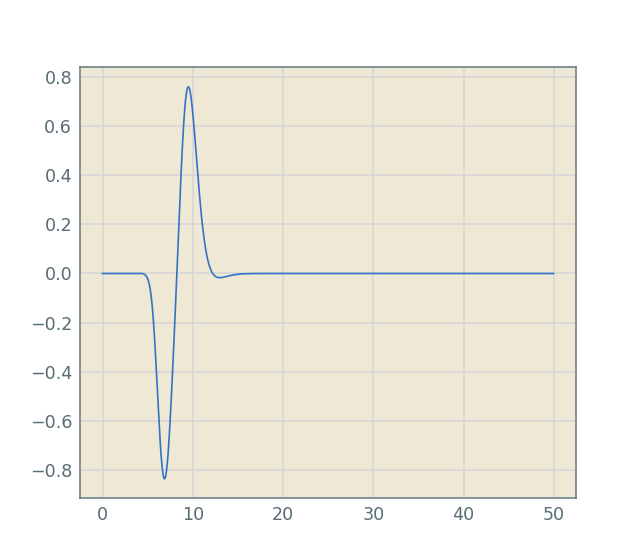

In [10]:
f2 = plt.figure()
plt.plot(t, emg[:,14])


In [11]:
pools[0].listSpikes()

<IPython.core.display.Javascript object>


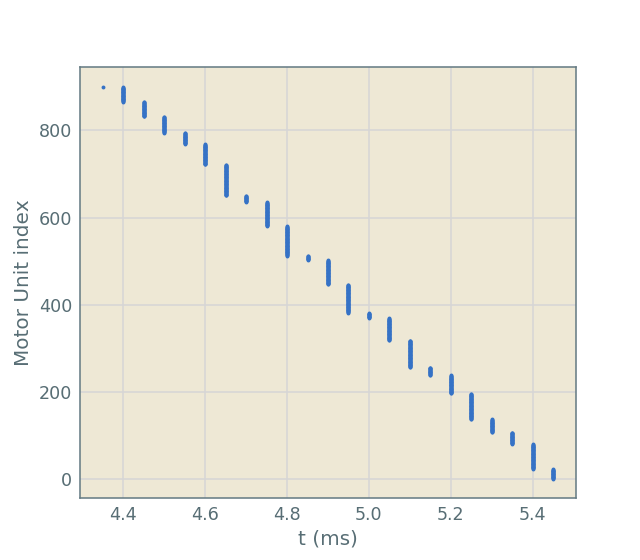

In [12]:
f3 = plt.figure()
plt.plot(sp1[:, 0],
         sp1[:, 1]+1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')


In [13]:
pools[0].poolTerminalSpikes[:, 1]

array([], dtype=float64)